In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# Define paths
base_path = '/content/drive/MyDrive/Chandra Project/my_dataset/extracted/CellData/chest_xray'
splits = ['train', 'test']
categories = ['NORMAL', 'PNEUMONIA']

# Collect data
summary = []

for split in splits:
    split_path = os.path.join(base_path, split)
    normal_count = len(os.listdir(os.path.join(split_path, 'NORMAL')))
    pneumonia_count = len(os.listdir(os.path.join(split_path, 'PNEUMONIA')))
    total = normal_count + pneumonia_count
    summary.append([split.capitalize(), total, normal_count, pneumonia_count])

# Create DataFrame
df_summary = pd.DataFrame(summary, columns=["Dataset Split", "Total Images", "Normal Cases", "Pneumonia Cases"])
df_summary.head()


,Dataset Split,Total Images,Normal Cases,Pneumonia Cases
0,Train,5233,1349,3884
1,Test,625,235,390


In [ ]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd

# Path to original training data
train_path = '/content/drive/MyDrive/Chandra Project/my_dataset/extracted/CellData/chest_xray/train'

# Collect all image file paths and labels
file_paths = []
labels = []

for label in ['NORMAL', 'PNEUMONIA']:
    folder = os.path.join(train_path, label)
    for fname in os.listdir(folder):
        fpath = os.path.join(folder, fname)
        file_paths.append(fpath)
        labels.append(label)

# Create a DataFrame for easy manipulation
df = pd.DataFrame({
    'filepath': file_paths,
    'label': labels
})

# Split into train and validation (80/20)
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=30)

In [ ]:
train_df.head()

,filepath,label
4953,/content/drive/MyDrive/Chandra Project/my_data...,PNEUMONIA
2483,/content/drive/MyDrive/Chandra Project/my_data...,PNEUMONIA
3729,/content/drive/MyDrive/Chandra Project/my_data...,PNEUMONIA
1851,/content/drive/MyDrive/Chandra Project/my_data...,PNEUMONIA
1783,/content/drive/MyDrive/Chandra Project/my_data...,PNEUMONIA


In [ ]:
import os
import pandas as pd

# Path to test directory
test_path = '/content/drive/MyDrive/Chandra Project/my_dataset/extracted/CellData/chest_xray/test'

# Gather file paths and labels
test_file_paths = []
test_labels = []

for label in ['NORMAL', 'PNEUMONIA']:
    folder = os.path.join(test_path, label)
    for fname in os.listdir(folder):
        fpath = os.path.join(folder, fname)
        test_file_paths.append(fpath)
        test_labels.append(label)

# Create DataFrame
test_df = pd.DataFrame({
    'filepath': test_file_paths,
    'label': test_labels
})

In [ ]:
test_df.head()

,filepath,label
0,/content/drive/MyDrive/Chandra Project/my_data...,NORMAL
1,/content/drive/MyDrive/Chandra Project/my_data...,NORMAL
2,/content/drive/MyDrive/Chandra Project/my_data...,NORMAL
3,/content/drive/MyDrive/Chandra Project/my_data...,NORMAL
4,/content/drive/MyDrive/Chandra Project/my_data...,NORMAL


In [ ]:
def summarize_dataset(df, name):
    normal = sum(df['label'] == 'NORMAL')
    pneumonia = sum(df['label'] == 'PNEUMONIA')
    total = len(df)
    return [name, total, normal, pneumonia]

summary_data = [
    summarize_dataset(train_df, "Train"),
    summarize_dataset(val_df, "Validation"),
    summarize_dataset(test_df, "Test")
]

summary_df = pd.DataFrame(summary_data, columns=["Dataset Split", "Total Images", "Normal Cases", "Pneumonia Cases"])
summary_df

,Dataset Split,Total Images,Normal Cases,Pneumonia Cases
0,Train,4186,1079,3107
1,Validation,1047,270,777
2,Test,625,235,390


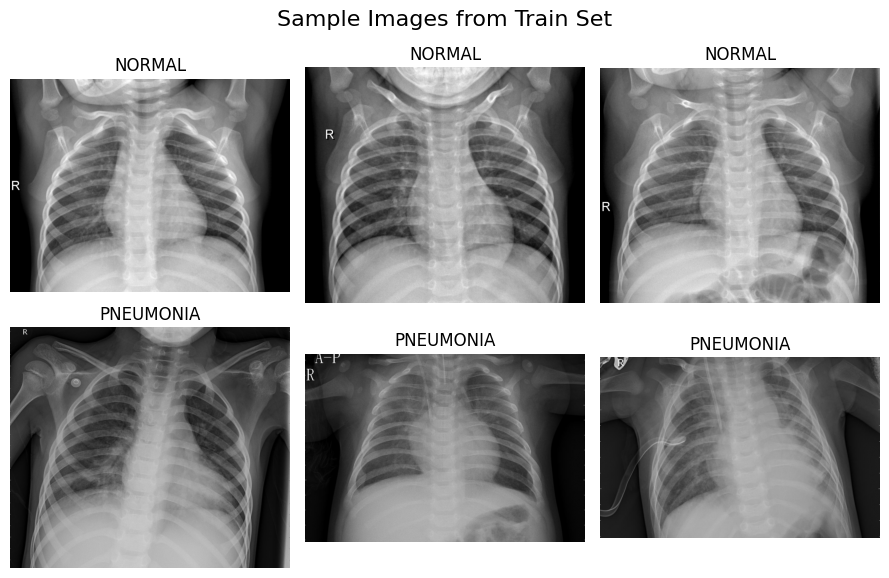

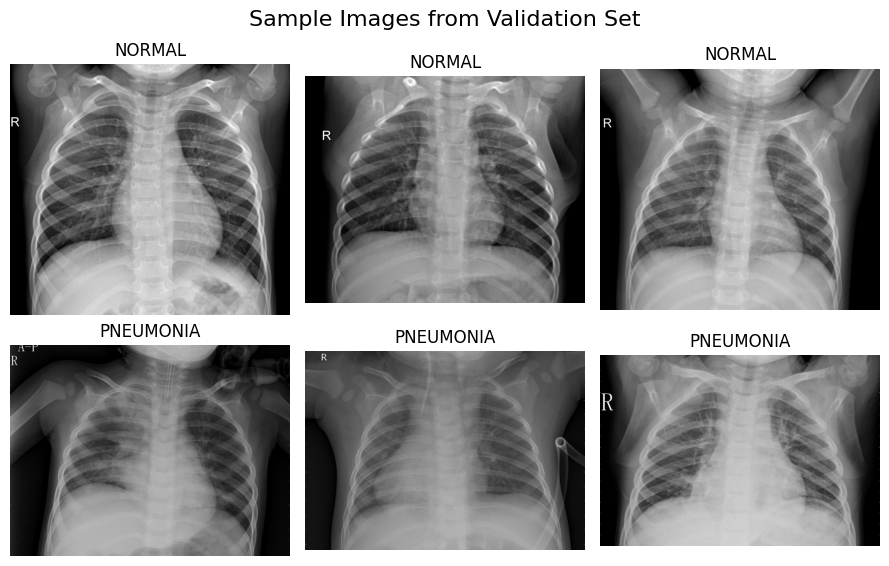

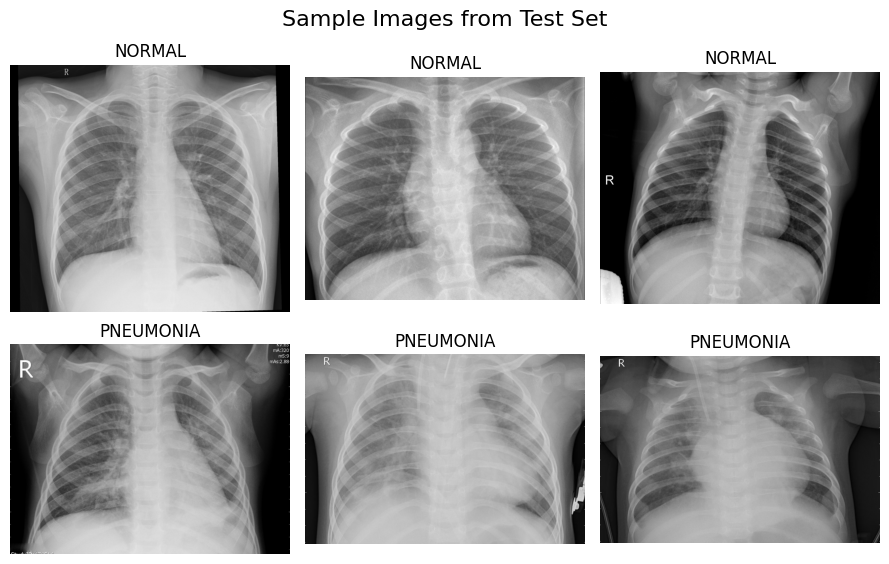

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_class_images(df, title, classes=['NORMAL', 'PNEUMONIA'], samples_per_class=3):
    plt.figure(figsize=(samples_per_class * 3, len(classes) * 3))

    for row_idx, label in enumerate(classes):
        subset = df[df['label'] == label].sample(samples_per_class, random_state=30).reset_index(drop=True)
        for col_idx in range(samples_per_class):
            idx = row_idx * samples_per_class + col_idx + 1
            plt.subplot(len(classes), samples_per_class, idx)
            img = mpimg.imread(subset.loc[col_idx, 'filepath'])
            plt.imshow(img, cmap='gray')
            plt.title(label)
            plt.axis('off')

    plt.suptitle(f"Sample Images from {title} Set", fontsize=16)
    plt.tight_layout()
    plt.show()

# Show images for each split
show_class_images(train_df, "Train")
show_class_images(val_df, "Validation")
show_class_images(test_df, "Test")


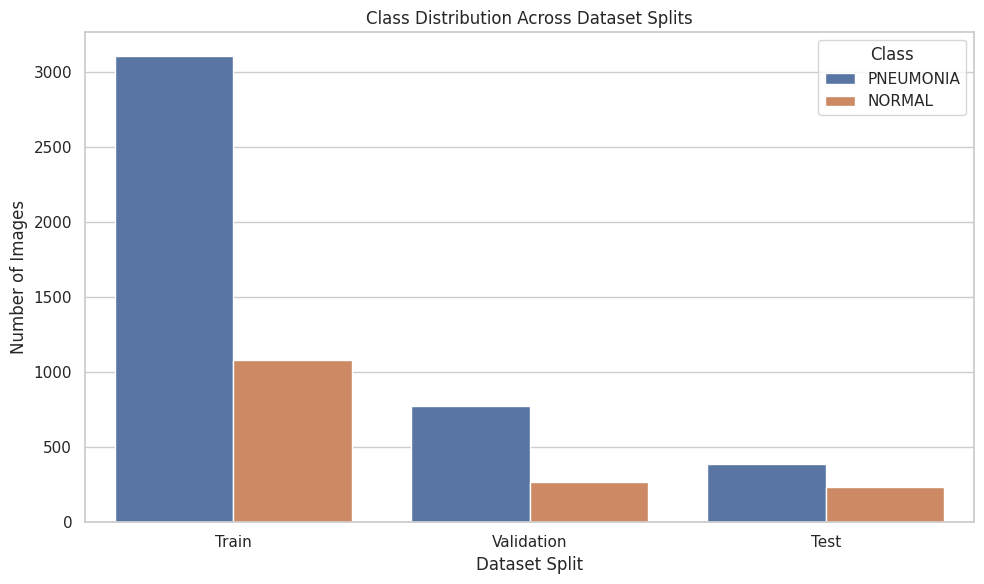

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Count total images per class in each dataset split
split_dfs = {
    "Train": "train_df",
    "Validation": "val_df",
    "Test": "test_df"
}

# Prepare data for the bar plot
plot_data = []

for split_name, df_name in split_dfs.items():
    df = eval(df_name)
    for label in df['label'].unique():
        count = sum(df['label'] == label)
        plot_data.append({"Split": split_name, "Class": label, "Count": count})

# Create a DataFrame for plotting
plot_df = pd.DataFrame(plot_data)

# Plotting class distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x="Split", y="Count", hue="Class")
plt.title("Class Distribution Across Dataset Splits")
plt.ylabel("Number of Images")
plt.xlabel("Dataset Split")
plt.tight_layout()
plt.show()


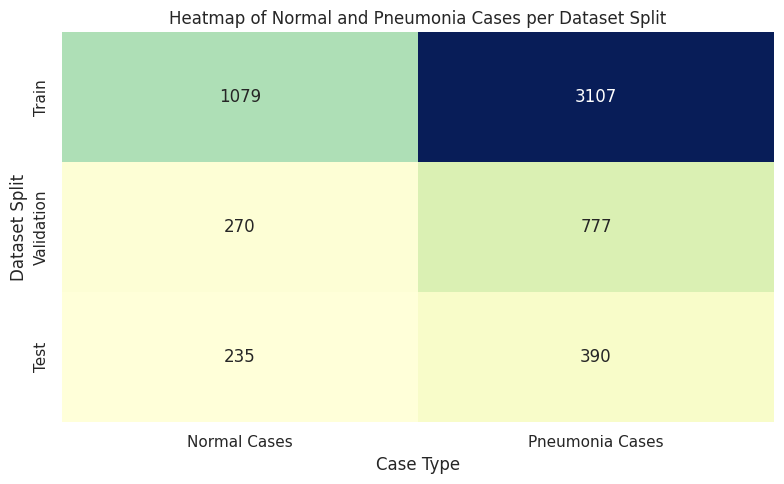

In [ ]:
heatmap_data = summary_df.set_index("Dataset Split")[["Normal Cases", "Pneumonia Cases"]]

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Heatmap of Normal and Pneumonia Cases per Dataset Split")
plt.ylabel("Dataset Split")
plt.xlabel("Case Type")
plt.tight_layout()
plt.show()


In [ ]:
# Count classes
normal_df = train_df[train_df['label'] == 'NORMAL']
pneumonia_df = train_df[train_df['label'] == 'PNEUMONIA']

# Oversample NORMAL to match PNEUMONIA
normal_oversampled = normal_df.sample(len(pneumonia_df), replace=True, random_state=30)

# Combine
train_df_balanced = pd.concat([pneumonia_df, normal_oversampled]).sample(frac=1, random_state=30).reset_index(drop=True)

# Check new class balance
print(train_df_balanced['label'].value_counts())

label
NORMAL       3107
PNEUMONIA    3107
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from DataFrames
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df_balanced,
    x_col='filepath',
    y_col='label',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True,
    color_mode='grayscale'
)


val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepath',
    y_col='label',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)


Found 6213 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(


Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(


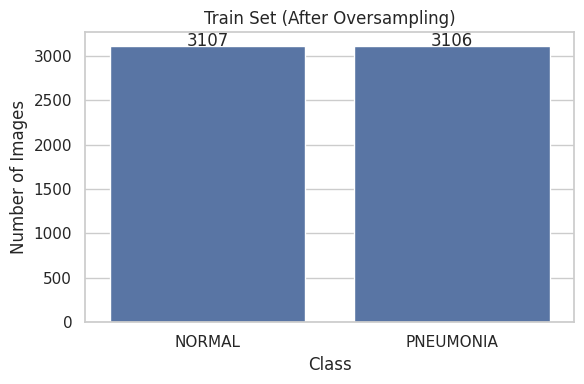

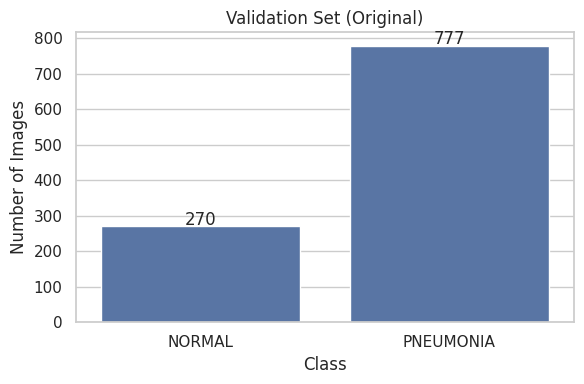

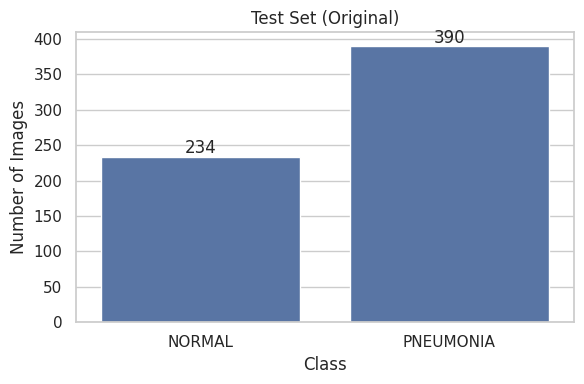

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to visualize class counts
def plot_generator_class_distribution(generator, title="Class Distribution"):
    labels = generator.classes
    class_labels = list(generator.class_indices.keys())
    counts = np.bincount(labels)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=class_labels, y=counts)
    plt.title(title)
    plt.ylabel("Number of Images")
    plt.xlabel("Class")
    for i, c in enumerate(counts):
        plt.text(i, c + 5, str(c), ha='center')
    plt.tight_layout()
    plt.show()

# Call it for each generator
plot_generator_class_distribution(train_generator, "Train Set (After Oversampling)")
plot_generator_class_distribution(val_generator, "Validation Set (Original)")
plot_generator_class_distribution(test_generator, "Test Set (Original)")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Build custom CNN
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
cnn_model.compile(optimizer=Adam(learning_rate=0.00001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,801 (18.42 MB)

 Trainable params: 4,828,353 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
EPOCHS = 15

cnn_history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 1829s 9s/step - accuracy: 0.7857 - loss: 0.5432 - val_accuracy: 0.7421 - val_loss: 1.5400
Epoch 2/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 148s 475ms/step - accuracy: 0.8878 - loss: 0.2915 - val_accuracy: 0.7421 - val_loss: 1.3697
Epoch 3/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 91s 468ms/step - accuracy: 0.9082 - loss: 0.2422 - val_accuracy: 0.9532 - val_loss: 0.1276
Epoch 4/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 90s 461ms/step - accuracy: 0.9209 - loss: 0.2118 - val_accuracy: 0.9561 - val_loss: 0.1292
Epoch 5/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 470ms/step - accuracy: 0.9301 - loss: 0.1968 - val_accuracy: 0.9026 - val_loss: 0.2581
Epoch 6/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 90s 464ms/step - accuracy: 0.9237 - loss: 0.2102 - val_accuracy: 0.9169 - val_loss: 0.2272
Epoch 7/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 473ms/step - accuracy: 0.9327 - loss: 0.1777 - val_accuracy: 0.9140 - val_loss: 0.2361
Epoch 8/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 90s 464ms/step - accuracy: 0.9375 - loss: 0

In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_generator)
print(f"Test Accuracy (Custom CNN): {test_acc:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 138s 7s/step - accuracy: 0.9300 - loss: 0.1947
Test Accuracy (Custom CNN): 0.9311


In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name="CNN"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

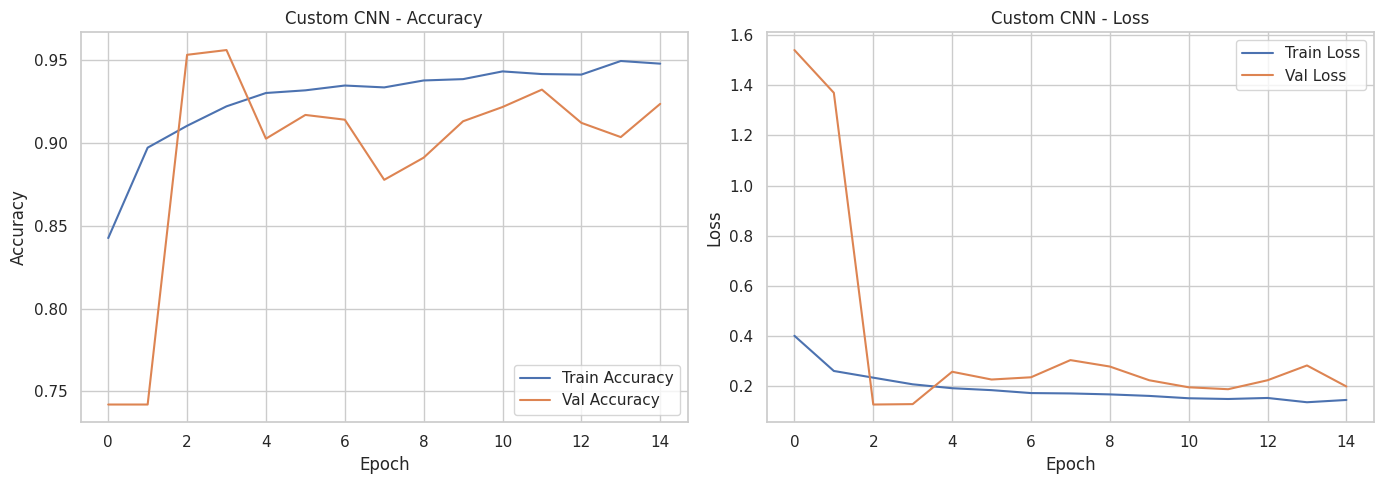

In [ ]:
# Call this after training
plot_training_history(cnn_history, model_name="Custom CNN")

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict labels on test set
y_true = test_generator.classes
y_pred_probs = cnn_model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Class labels
class_names = list(test_generator.class_indices.keys())


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.89      0.93      0.91       234
   PNEUMONIA       0.96      0.93      0.94       390

    accuracy                           0.93       624
   macro avg       0.92      0.93      0.93       624
weighted avg       0.93      0.93      0.93       624



<Figure size 600x600 with 0 Axes>

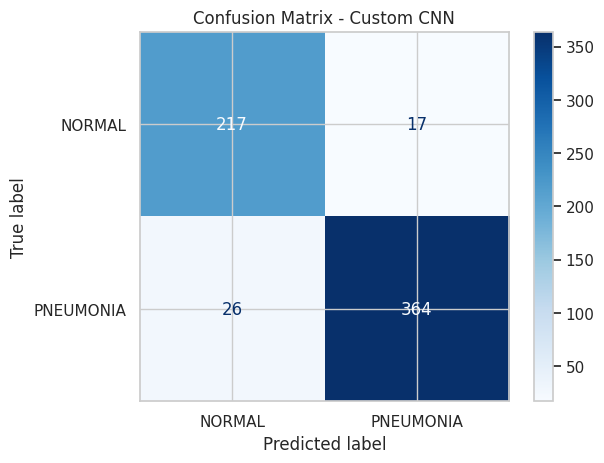

In [ ]:
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Custom CNN")
plt.show()


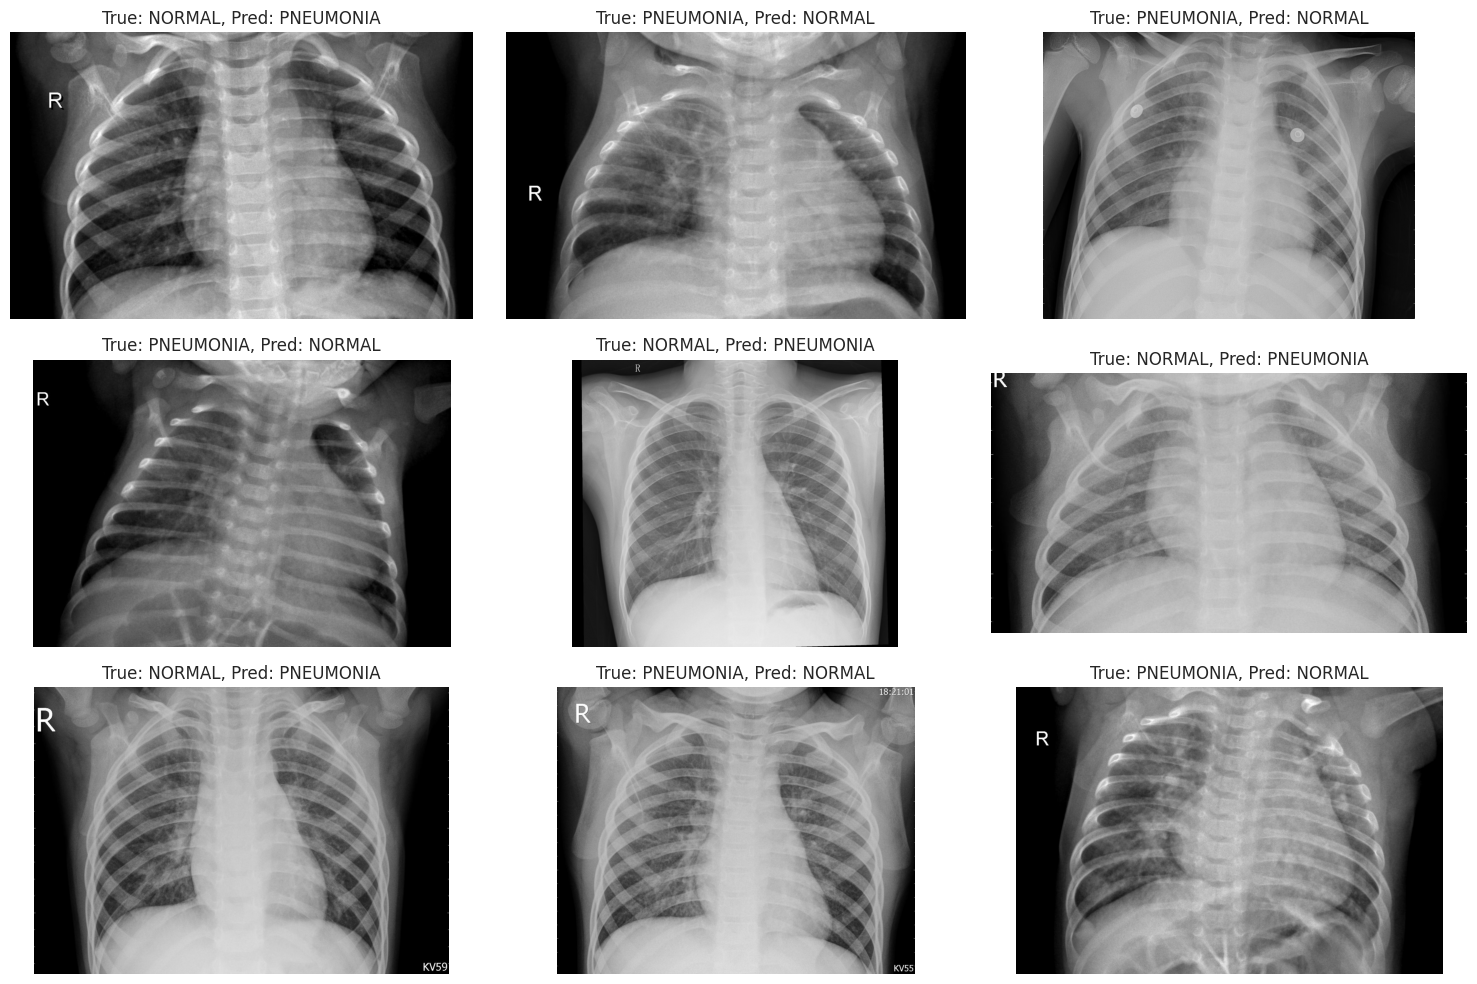

In [ ]:
import matplotlib.pyplot as plt
import random

# Get filenames and predictions
filepaths = test_generator.filepaths
misclassified_idx = np.where(y_true != y_pred)[0]

# Show a few misclassified images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random.sample(list(misclassified_idx), min(9, len(misclassified_idx)))):
    img = plt.imread(filepaths[idx])
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {class_names[y_true[idx]]}, Pred: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Lambda
import tensorflow as tf

# Define grayscale input (150x150x1)
input_layer = Input(shape=(150, 150, 1))

# Duplicate the grayscale channel into 3 channels using a Lambda layer
rgb_input = Lambda(lambda x: tf.image.grayscale_to_rgb(x))(input_layer)

# Load MobileNetV2 base with modified input
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=rgb_input)

# Freeze base model layers
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Build the final model
mobilenet_gray_model = Model(inputs=input_layer, outputs=output)

# Compile
mobilenet_gray_model.compile(optimizer=Adam(learning_rate=0.00001),
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

mobilenet_gray_model.summary()


/tmp/ipython-input-261436322.py:15: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=rgb_input)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 150, 150,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ lambda[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
EPOCHS = 10

mobilenet_gray_history = mobilenet_gray_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 3985s 20s/step - accuracy: 0.5415 - loss: 0.8271 - val_accuracy: 0.7278 - val_loss: 0.5651
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 475ms/step - accuracy: 0.6881 - loss: 0.6001 - val_accuracy: 0.8138 - val_loss: 0.4500
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 476ms/step - accuracy: 0.7740 - loss: 0.4813 - val_accuracy: 0.8491 - val_loss: 0.3881
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 140s 468ms/step - accuracy: 0.8223 - loss: 0.4029 - val_accuracy: 0.8615 - val_loss: 0.3512
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 474ms/step - accuracy: 0.8540 - loss: 0.3668 - val_accuracy: 0.8682 - val_loss: 0.3297
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 474ms/step - accuracy: 0.8636 - loss: 0.3258 - val_accuracy: 0.8739 - val_loss: 0.3131
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 477ms/step - accuracy: 0.8733 - loss: 0.3173 - val_accuracy: 0.8739 - val_loss: 0.2999
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 470ms/step - accuracy: 0.8842 - loss: 

In [ ]:
test_loss, test_acc = mobilenet_gray_model.evaluate(test_generator)
print(f"Test Accuracy (MobileNetV2 w/ Grayscale): {test_acc:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 328s 17s/step - accuracy: 0.8764 - loss: 0.3000
Test Accuracy (MobileNetV2 w/ Grayscale): 0.8782


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get true labels
y_true = test_generator.classes

# Predict probabilities and apply threshold
y_pred_probs = mobilenet_gray_model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Get class names from the generator
class_names = list(test_generator.class_indices.keys())


20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 475ms/step


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.81      0.88      0.84       234
   PNEUMONIA       0.92      0.88      0.90       390

    accuracy                           0.88       624
   macro avg       0.87      0.88      0.87       624
weighted avg       0.88      0.88      0.88       624



<Figure size 600x600 with 0 Axes>

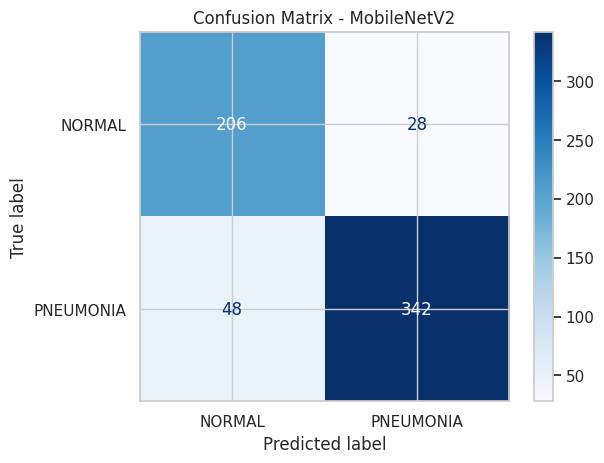

In [ ]:
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - MobileNetV2")
plt.show()

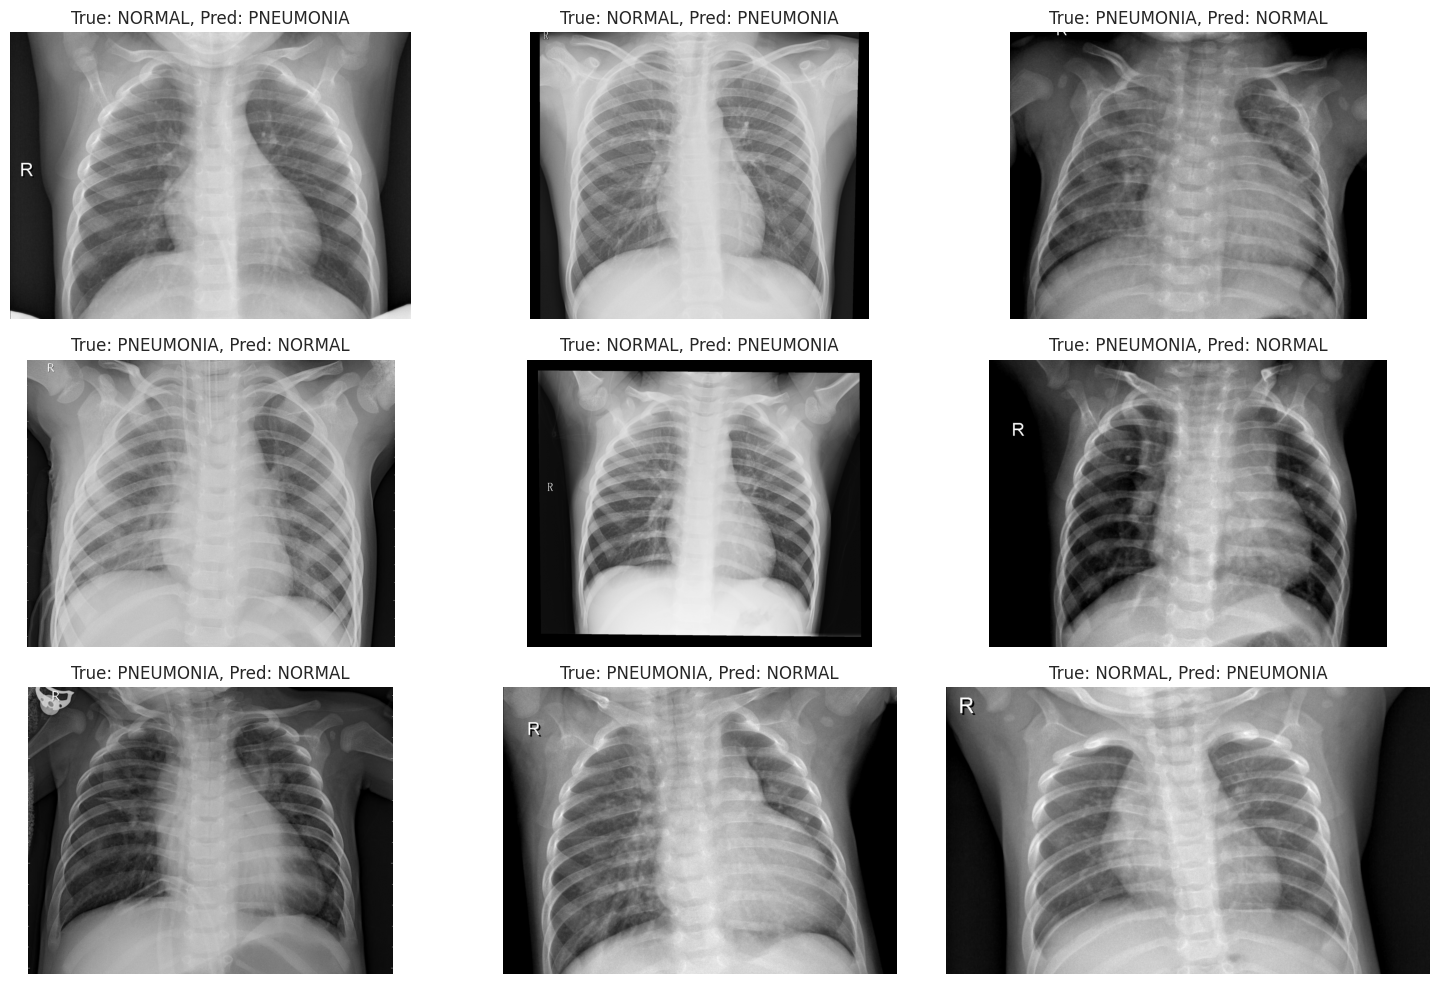

In [ ]:
import matplotlib.pyplot as plt
import random

filepaths = test_generator.filepaths
misclassified_idx = np.where(y_true != y_pred)[0]

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random.sample(list(misclassified_idx), min(9, len(misclassified_idx)))):
    img = plt.imread(filepaths[idx])
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {class_names[y_true[idx]]}, Pred: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

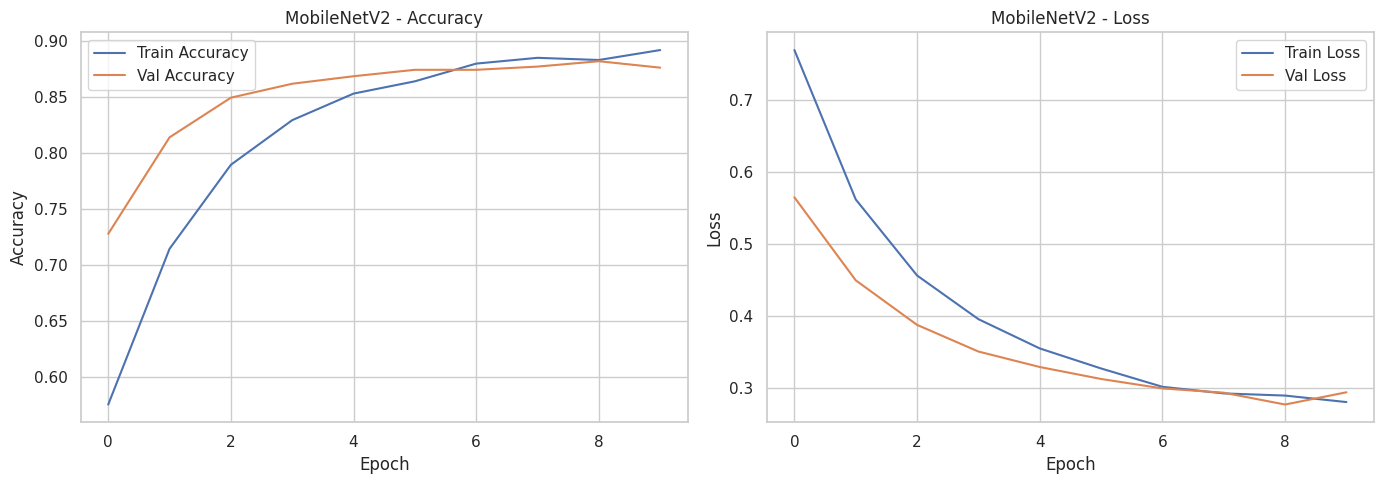

In [ ]:
plot_training_history(mobilenet_gray_history, model_name="MobileNetV2")